In [1]:
# allows showing the tensorboard widget
%load_ext tensorboard
# reload imports on rerun
%load_ext autoreload

# set to 1 for cuda debugging
%set_env CUDA_LAUNCH_BLOCKING=0

env: CUDA_LAUNCH_BLOCKING=0


In [2]:
# show the tensorboard widget
%tensorboard --logdir lightning_logs

In [3]:
# enable import reloads
%autoreload 2

import pytorch_lightning as lightning

import torch
from torch.utils.data import TensorDataset, Subset
from sklearn.datasets import make_moons, make_circles

import numpy as np
import matplotlib.pyplot as plt

from rectflow import RectifyingFlow
from data import ProductSet

In [4]:
plt.rc("figure", dpi=250)
plt.rc("legend", fontsize=6)

In [5]:
accelerator = "gpu"
devices = 1

In [6]:
torch.autograd.set_grad_enabled(False)

In [7]:
n_train = 1000
n_val = 100

In [8]:
def make_blobs(samples_per_blob: int = 100, *, centers: int = 8, radius: float = 10.0, std: float = 1.0, shuffle=True):
    """ Make 2D gaussian blobs distributed equally on a circle about the origin """
    phis = np.linspace(0, 2 * np.pi, num=centers + 1)[:-1]
    means = np.empty((centers, 2))
    means[:, 0] = radius * np.cos(phis)
    means[:, 1] = radius * np.sin(phis)

    samples = np.random.normal(means, std, size=(samples_per_blob, centers, 2))
    labels = np.resize(np.arange(centers), (samples_per_blob, centers))

    # flatten
    samples = samples.reshape(samples_per_blob * centers, 2)
    labels = labels.reshape(-1)

    if shuffle:
        sort = np.random.permutation(len(samples))
        samples = samples[sort, ...]
        labels = labels[sort, ...]

    return samples, labels

In [9]:
# features, labels = make_blobs(n_train // 4, centers=4)
# noise = np.random.standard_normal(features.shape)
# features = torch.from_numpy(features.astype(np.float32))
# noise = torch.from_numpy(noise.astype(np.float32))

# train_data = ProductSet(features, noise)

# features, labels = make_blobs(n_val  // 4, centers=4)
# noise = np.random.standard_normal(features.shape)
# features = torch.from_numpy(features.astype(np.float32))
# noise = torch.from_numpy(noise.astype(np.float32))

# val_data = ProductSet(features, noise)


features, labels = make_blobs(n_train // 4, centers=4, radius=20.0, std=2.0)
latent_features, latent_labels = make_blobs(n_train // 4, centers=4, radius=10.0, std=1.0)

features = torch.from_numpy(features.astype(np.float32))
latent_features = torch.from_numpy(latent_features.astype(np.float32))

train_data = ProductSet(features, latent_features)


features, labels = make_blobs(n_val // 4, centers=4, radius=20.0, std=2.0)
latent_features, latent_labels = make_blobs(n_val // 4, centers=4, radius=10.0, std=1.0)

features = torch.from_numpy(features.astype(np.float32))
latent_features = torch.from_numpy(latent_features.astype(np.float32))

val_data = ProductSet(features, latent_features)

len(train_data), len(val_data)

(1000000, 10000)

In [10]:
# features, labels = make_moons(n_train, shuffle=True, noise=0.05)
# noise = np.random.standard_normal((n_train, 2))
# features = torch.from_numpy(features.astype(np.float32))
# noise = torch.from_numpy(noise.astype(np.float32))

# train_data = ProductSet(features, noise)
# # random_train_subset = Subset(train_data, indices=torch.randperm(len(train_data))[:2 * n_train])

# features, labels = make_moons(n_val, shuffle=True, noise=0.05)
# noise = np.random.standard_normal((n_val, 2))
# features = torch.from_numpy(features.astype(np.float32))
# noise = torch.from_numpy(noise.astype(np.float32))

# val_data = ProductSet(features, noise)
# # random_val_subset = Subset(val_data, indices=torch.randperm(len(val_data))[:2 * n_val])

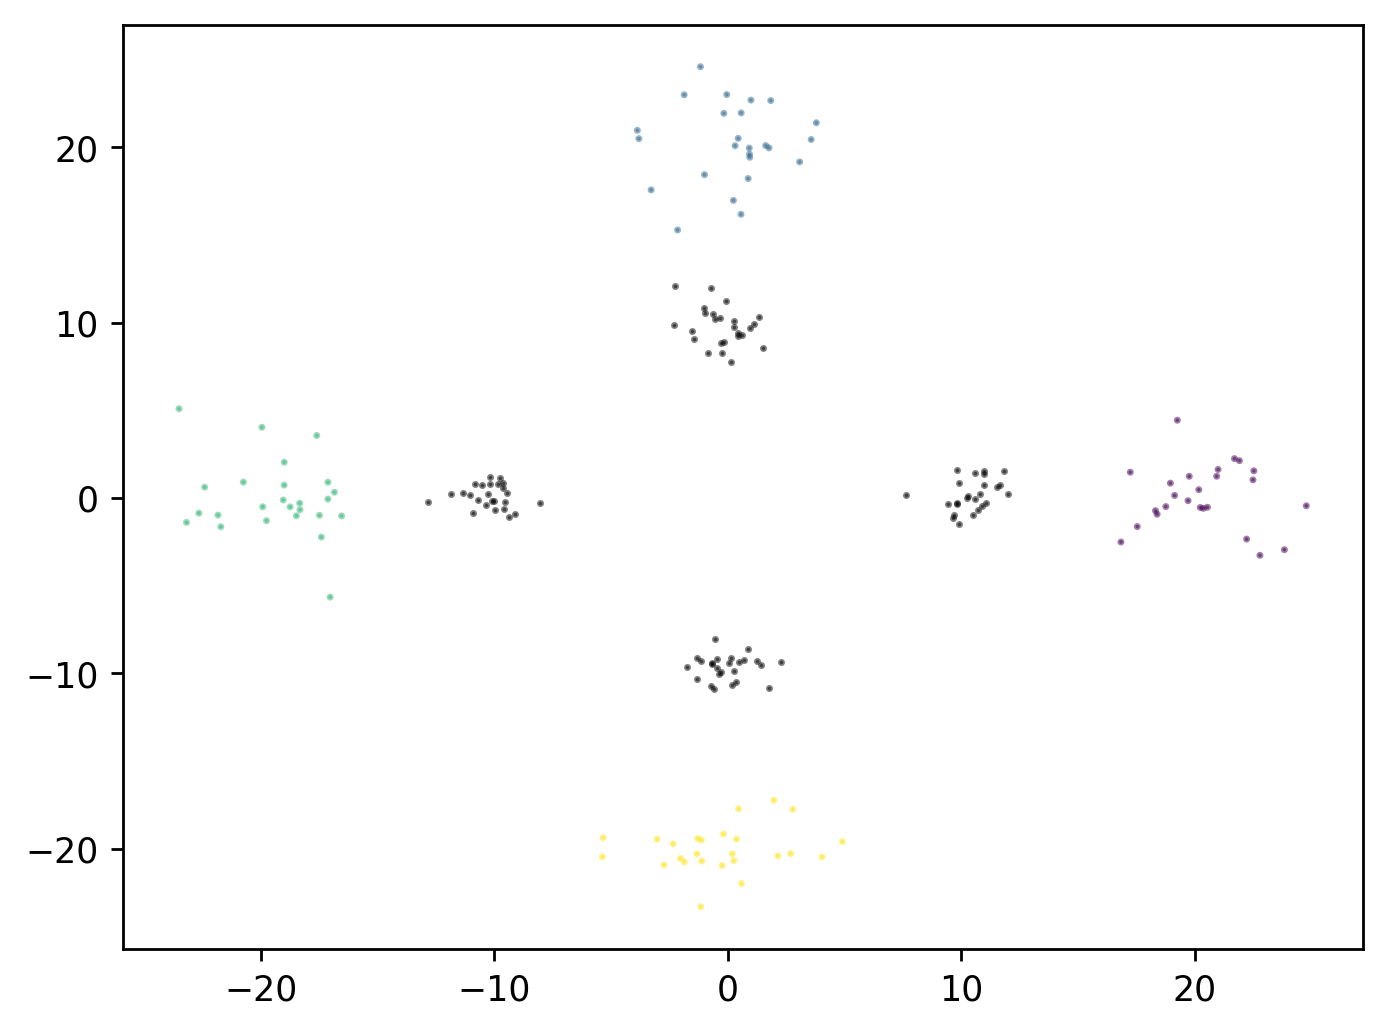

In [11]:
plt.scatter(features[:, 0], features[:, 1], s=1, alpha=0.5, c=labels)
plt.scatter(latent_features[:, 0], latent_features[:, 1], s=1, c="black", alpha=0.5)

In [12]:
hparams = dict(
    input_shape=(2,),
    batch_size=1024,
    sample_size=16,
    learning_rate=1e-3,
    weight_decay=1e-5,
    integrator="rk45",
    network_widths=[64, 128, 128, 64],
)

In [13]:
model = RectifyingFlow(train_data, val_data, test_data=None, **hparams)

In [22]:
trainer = lightning.Trainer(
    accelerator=accelerator,
    devices=devices,
    benchmark=True,
    max_epochs=50,
)

with torch.autograd.enable_grad():
    model.train()
    trainer.fit(model)

# best_model = model.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
# best_model.eval()

# model = best_model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 33.4 K
---------------------------------------
33.4 K    Trainable params
0         Non-trainable params
33.4 K    Total params
0.134     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


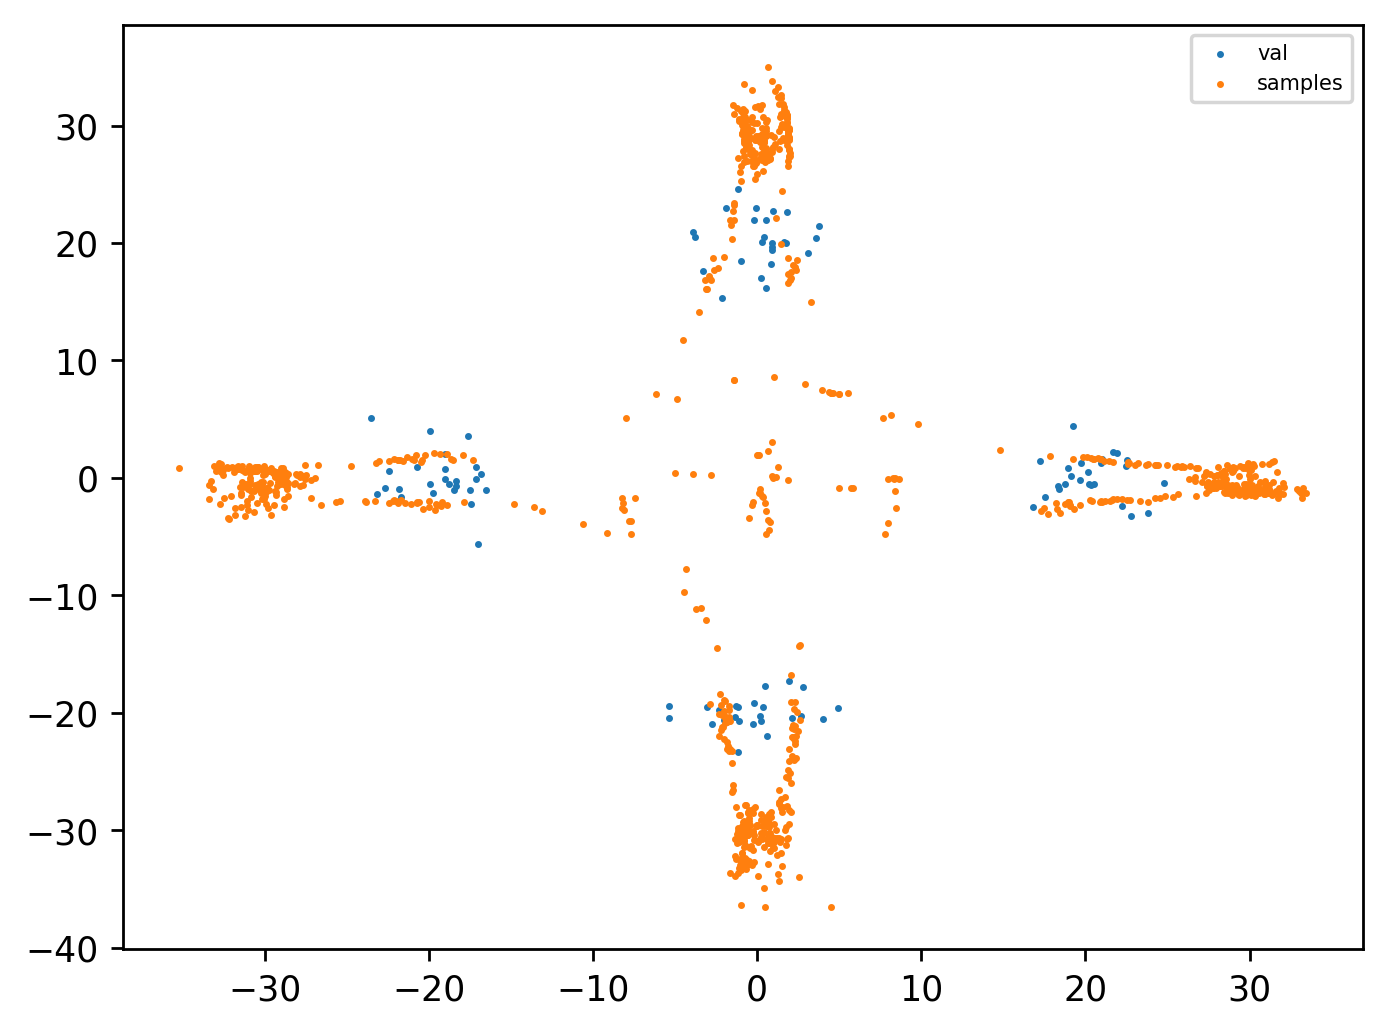

In [23]:
samples, _ = make_blobs(1000 // 4, centers=4, radius=10.0, std=1.0)
# samples = np.random.standard_normal((1000, 2))
samples = samples.astype(np.float32)
samples = torch.from_numpy(samples)
samples = model.inverse(samples, steps=int(1e3))

plt.scatter(features[:, 0], features[:, 1], s=1, label="val")
# plt.xlim(plt.xlim())
# plt.ylim(plt.ylim())
plt.scatter(samples[:, 0], samples[:, 1], s=1, label="samples")
plt.legend()

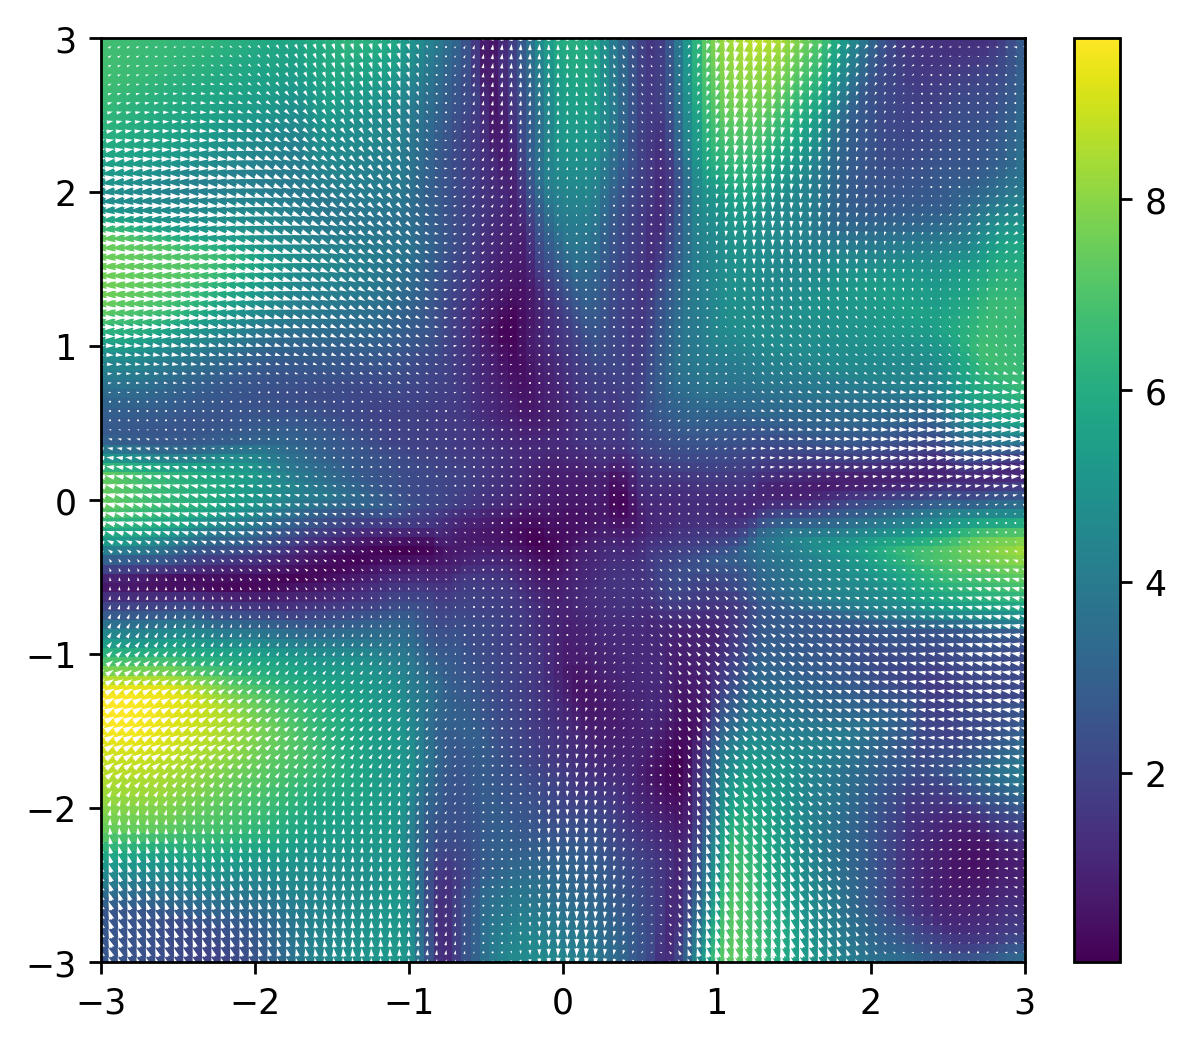

In [24]:
n, m = 100, 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, m)

xx, yy = np.meshgrid(x, y)
x, y = xx.flatten(), yy.flatten()
xy = np.stack((x, y), axis=1)
xy = torch.from_numpy(xy).to(torch.float32).to(model.device)

v = model.network(xy)
norm = np.linalg.norm(v, axis=-1)

artist = plt.imshow(norm.reshape(n, m), extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(artist, fraction=0.046, pad=0.04)
plt.quiver(x, y, v[:, 0], v[:, 1], angles="xy", pivot="mid", color="white")

In [25]:
samples, _ = make_blobs(1000 // 4, centers=4, radius=10.0, std=1.0)
# samples = np.random.standard_normal((1000, 2))
samples = samples.astype(np.float32)
samples = torch.from_numpy(samples)
samples = samples.to(model.device)

steps = int(1e2)
dt = -1.0 / steps
x = samples
trajectories = [x.clone()]

for step in range(steps):
    x = model.integrator.step(f=model.network, x=x, dt=dt)
    trajectories.append(x.clone())

trajectories = torch.stack(trajectories)

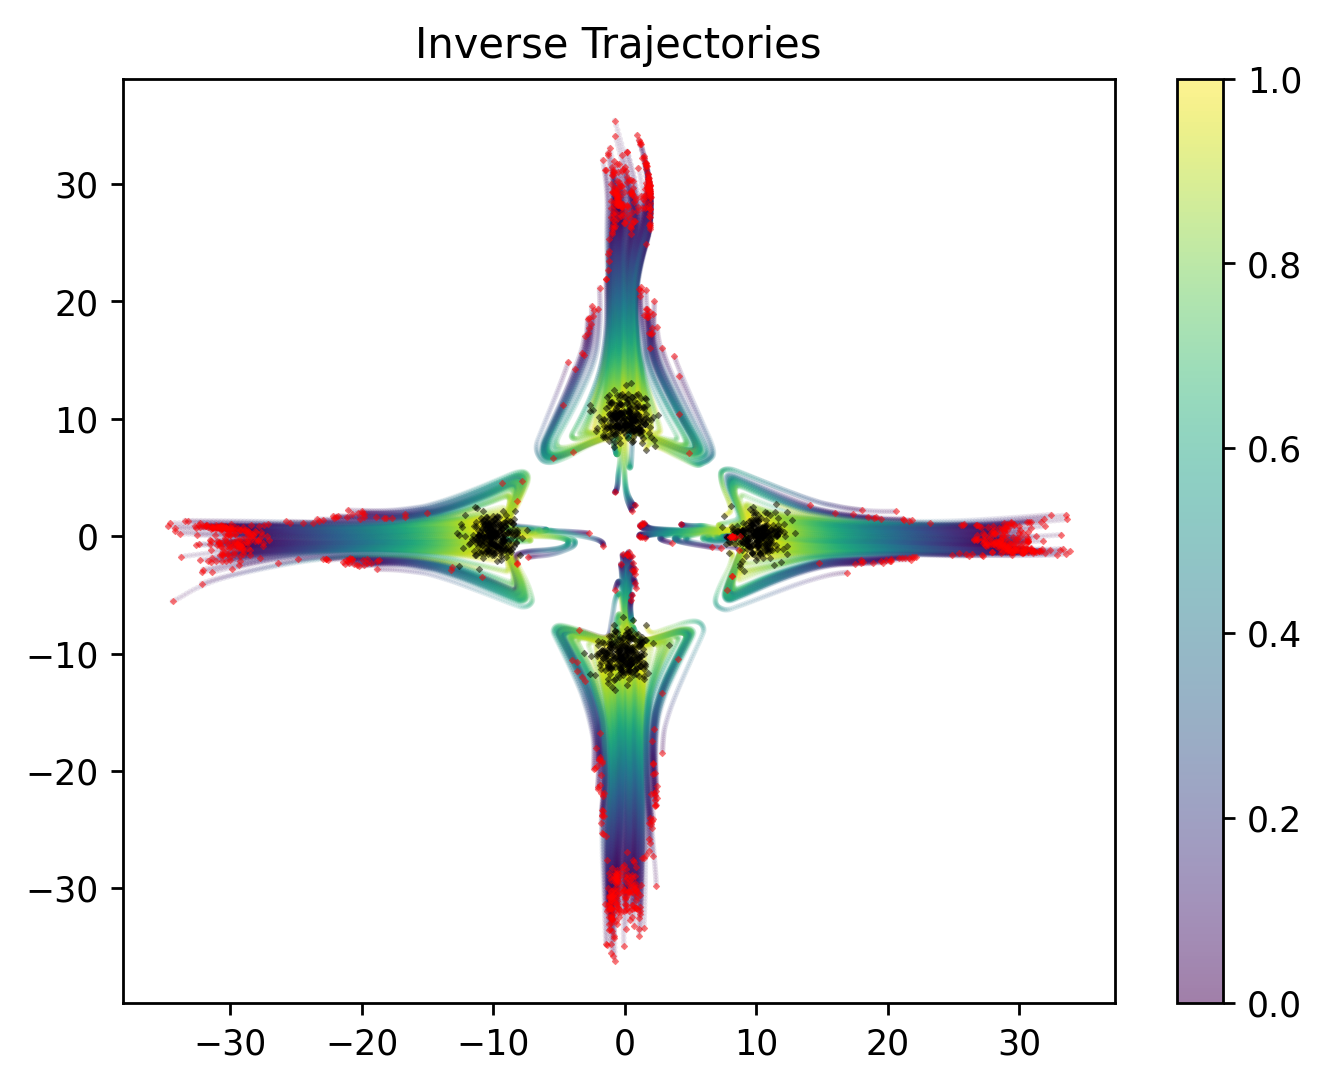

In [26]:
t = np.linspace(1, 0, steps + 1)
for i in range(len(samples)):
    plt.scatter(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.1, c=t, s=0.5)

plt.scatter(trajectories[0, :, 0], trajectories[0, :, 1], alpha=0.5, marker="x", c="black", s=1)
plt.scatter(trajectories[-1, :, 0], trajectories[-1, :, 1], alpha=0.5, marker="x", c="red", s=1)

plt.colorbar()
plt.title("Inverse Trajectories")
plt.savefig("plots/inverse_trajectories.png")

In [27]:
samples, _ = make_blobs(1000 // 4, centers=4, radius=20.0, std=2.0)
samples = samples.astype(np.float32)
samples = torch.from_numpy(samples)
samples = samples.to(model.device)

steps = int(1e2)
dt = 1.0 / steps
x = samples
trajectories = [x.clone()]

for step in range(steps):
    x = model.integrator.step(f=model.network, x=x, dt=dt)
    trajectories.append(x.clone())

trajectories = torch.stack(trajectories)

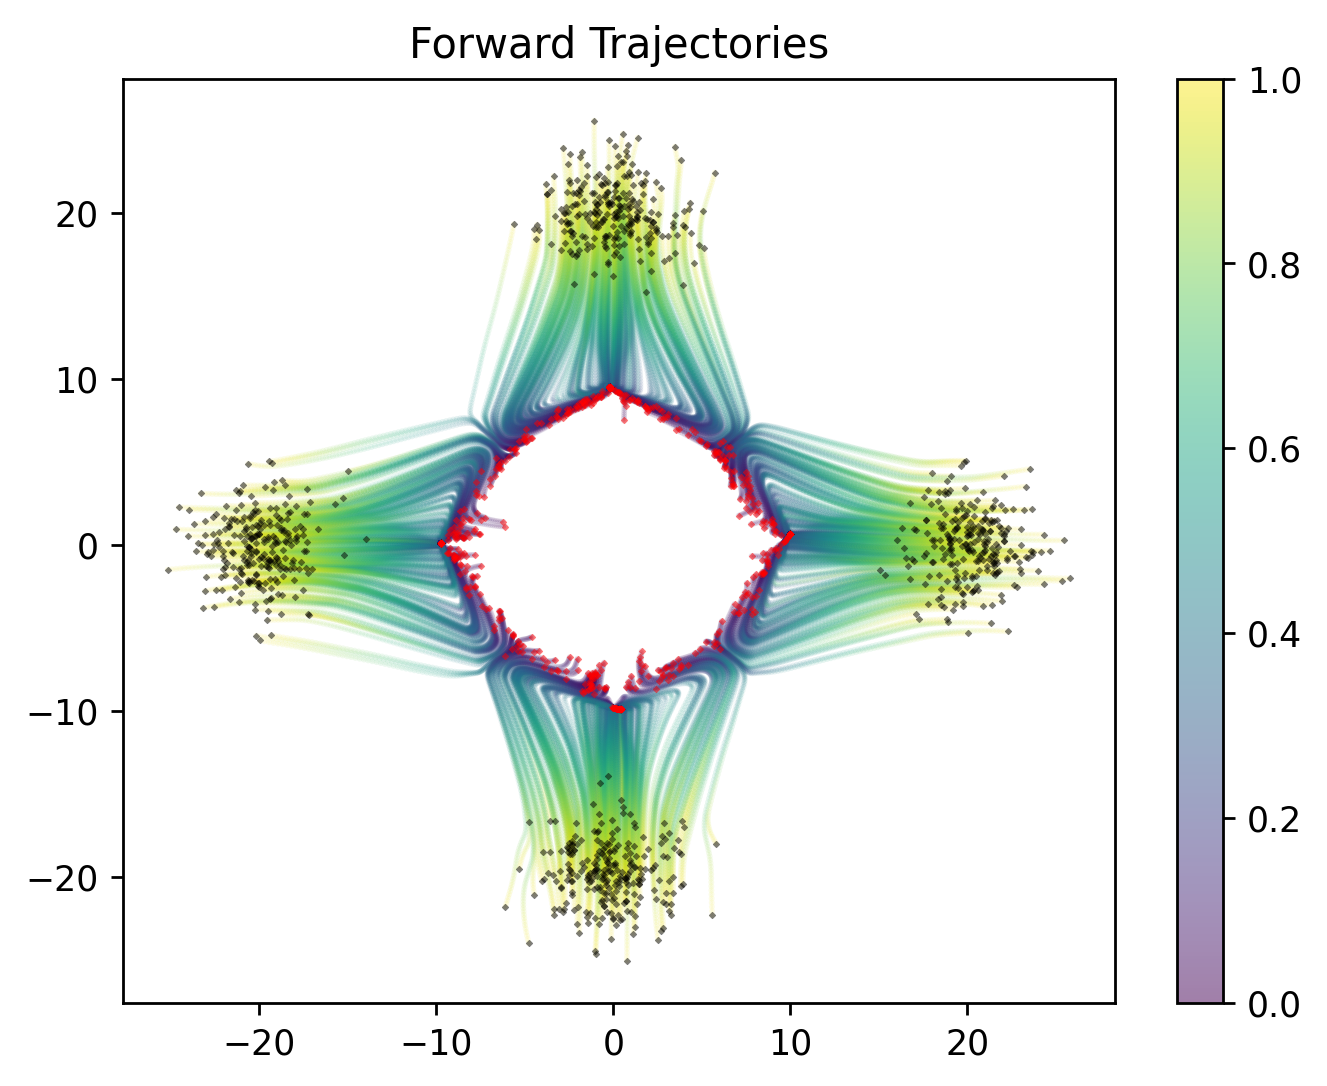

In [28]:
t = np.linspace(1, 0, steps + 1)
for i in range(len(samples)):
    plt.scatter(trajectories[:, i, 0], trajectories[:, i, 1], alpha=0.1, c=t, s=0.5)

plt.scatter(trajectories[0, :, 0], trajectories[0, :, 1], alpha=0.5, marker="x", c="black", s=1)
plt.scatter(trajectories[-1, :, 0], trajectories[-1, :, 1], alpha=0.5, marker="x", c="red", s=1)

plt.colorbar()
plt.title("Forward Trajectories")
plt.savefig("plots/forward_trajectories.png")

In [29]:
# reflow: replace data by simulated flow


product_set = model.train_data
x = product_set.d1
z = product_set.d2

# replace data
# xx = model.inverse(z, steps=int(1e3))
# product_set.d1 = xx

# replace latent data?
zz = model.forward(x, steps=int(1e3))
product_set.d2 = zz

# resample latent data?
# product_set.d2 = torch.randn_like(z)